## 1.0 Bibliotecas

In [141]:
import numpy               as np
import pandas              as pd
import matplotlib.pyplot   as plt
import seaborn             as sn
import scipy.stats         as stats


from sklearn.preprocessing        import OneHotEncoder
from sklearn.model_selection      import train_test_split
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

from google.colab                 import drive

import warnings
warnings.filterwarnings("ignore")

## 2.0 Leitura e importação de registros

In [111]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [112]:
df = pd.read_csv('/content/gdrive/MyDrive/Datasets/AdultIncome/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [113]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Features description

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* class: >50K, <=50K

## 3.0 Tratamento de dados

Certas instâncias estão caracterizadas por "?", logo, espera-se que sejam valores faltantes e tamném não sabemos a quantidade de instâncias como esta pertencem a cada feature do nosso daraframe.

In [114]:
df = df.replace("?", np.nan)

In [115]:
display(df.isnull().sum())
df = df.dropna()
print("\nRetira faltantes...\nTotal de valores faltantes:")
display(df.isnull().sum().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


Retira faltantes...
Total de valores faltantes:


0

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


* O interessante de termos uma distribuição de idades é que podemos entender se existe alguma faixa etária em específico que possui uma carga horária de serviço mais elevada comparada a outras, assim como também conseguimos enxergar qual faixa etário consegue ter renda maior que 50K. Logo, iremos criar uma feature nova para criar nossos intervalores, mais ou menos faixas etárias.

In [117]:
df["age_bins"] = pd.cut(
    x=df["age"],
    bins=[1, 17, 18, 30, 40, 50, 60, 70, 80, 90, 100],
)

## 4.0 Visualização de dados

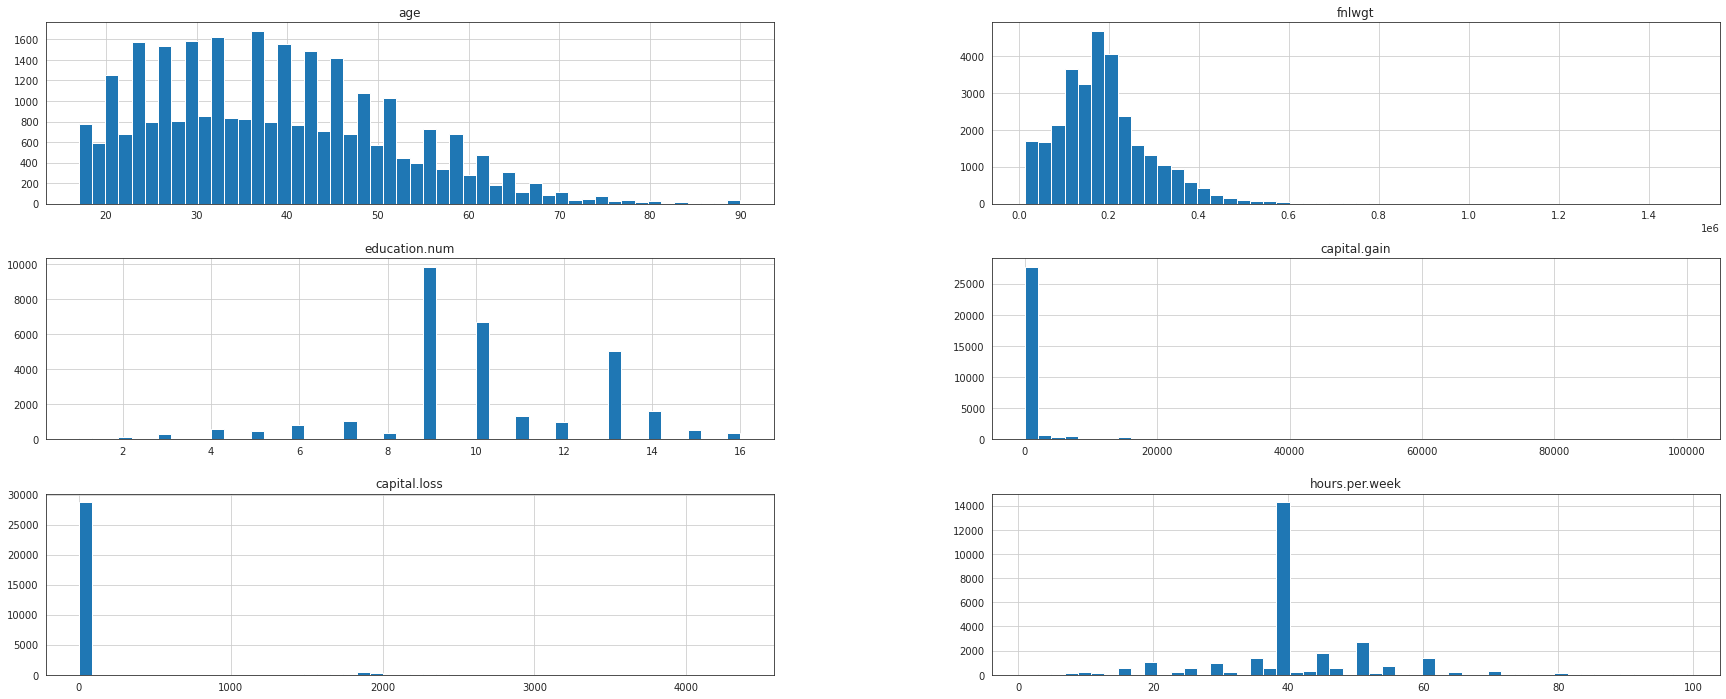

In [118]:
df.hist(bins=50, figsize=(30,12));

* Ao analisar o histograma da distribuição de idades da nossa tabela, conseguimos visualizar que existe uma quantidade consideravel de pessoas de 20 a 50 anos, porém, podemos também visualizar que pode existir certos intervalores de idades que estão fora do comum. Por exemplo, de 30 - 35 anos temos uma quantidade significativa de pessoas.

* Vale salientar, o comportamento de horas de serviço por semana, em que podemos definir uma carga horária comum de 40 - 55 horas de serviço, qual seria a idade e o tipo de serviço que essas pessoas possuem e prestam? 

In [119]:
df.groupby('age_bins').agg({'hours.per.week':'mean',
                            'age_bins':'count'}).style.highlight_max(axis=0, color='grey')

,hours.per.week,age_bins
age_bins,,
"(1, 17]",20.378049,328
"(17, 18]",25.167785,447
"(18, 30]",38.650306,8822
"(30, 40]",43.537547,8163
"(40, 50]",43.496125,6710
"(50, 60]",42.619403,3886
"(60, 70]",36.345288,1422
"(70, 80]",27.828479,309
"(80, 90]",33.386667,75


* Interessante olharmos para a tebale acima, conseguimos perceber que a maior média de horas de serviço é o grupo de faixa etária de 30-40 anos. Mas, analisando essas faixas, vamos identidentificar se existe uma relação de carga horário e ganhar mais ou menos que 50k

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


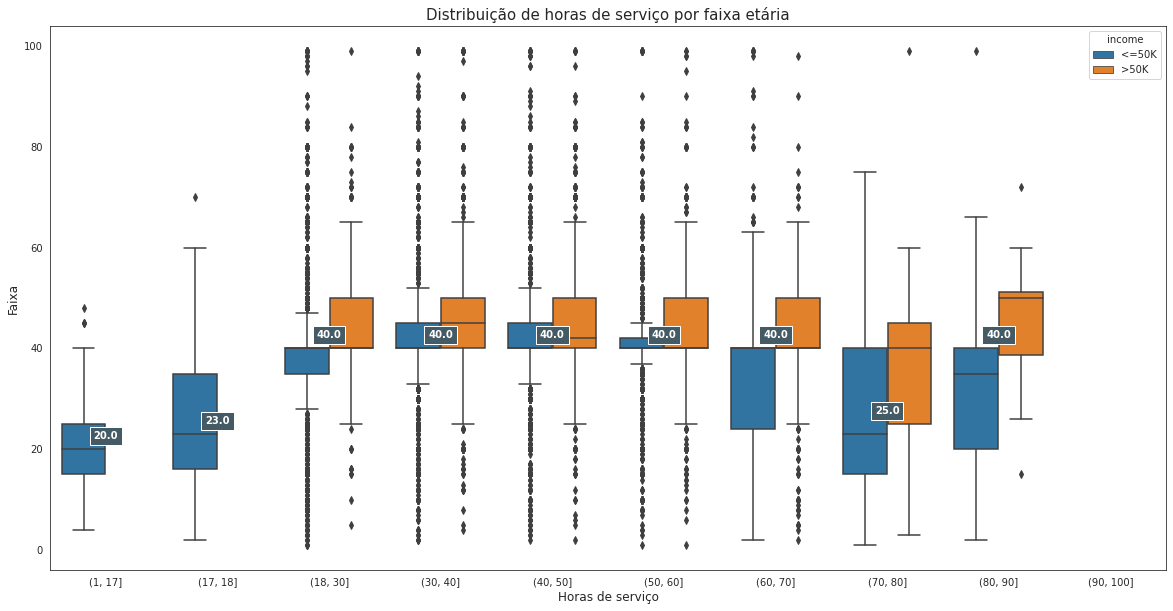

In [120]:
sn.set_style("white")
f, ax = plt.subplots(figsize=(20, 10))
box_plot = sn.boxplot(x="age_bins", y="hours.per.week", hue='income', data=df)

medians = df.groupby(['age_bins'])['hours.per.week'].median()
vertical_offset = df['hours.per.week'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center', size=10, color='w', weight='semibold', bbox=dict(facecolor='#445A64'))
ax.set_title('Distribuição de horas de serviço por faixa etária', fontsize=15)
ax.set_xlabel('Horas de serviço', fontsize=12)
ax.set_ylabel('Faixa', fontsize=12)
ax;

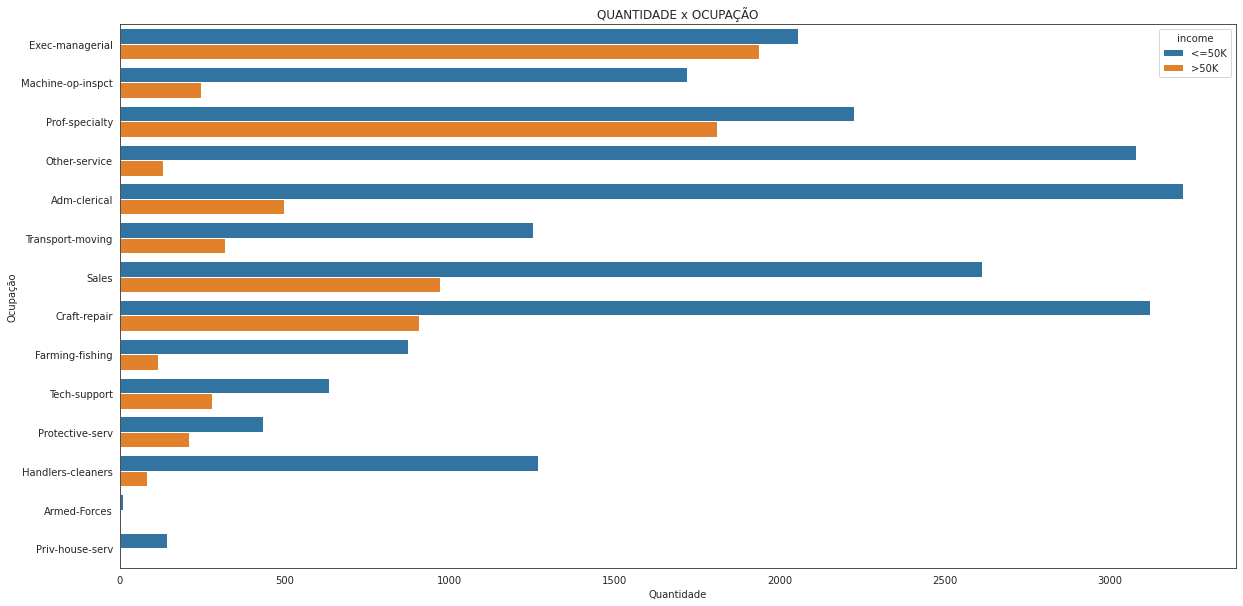

In [121]:
f, ax = plt.subplots(figsize=(20, 10))
sn.countplot(y='occupation', hue='income', data=df, orient='h')
ax.set_title('QUANTIDADE x OCUPAÇÃO', fontsize=12)
ax.set_xlabel('Quantidade', fontsize=10)
ax.set_ylabel('Ocupação', fontsize=10)
ax

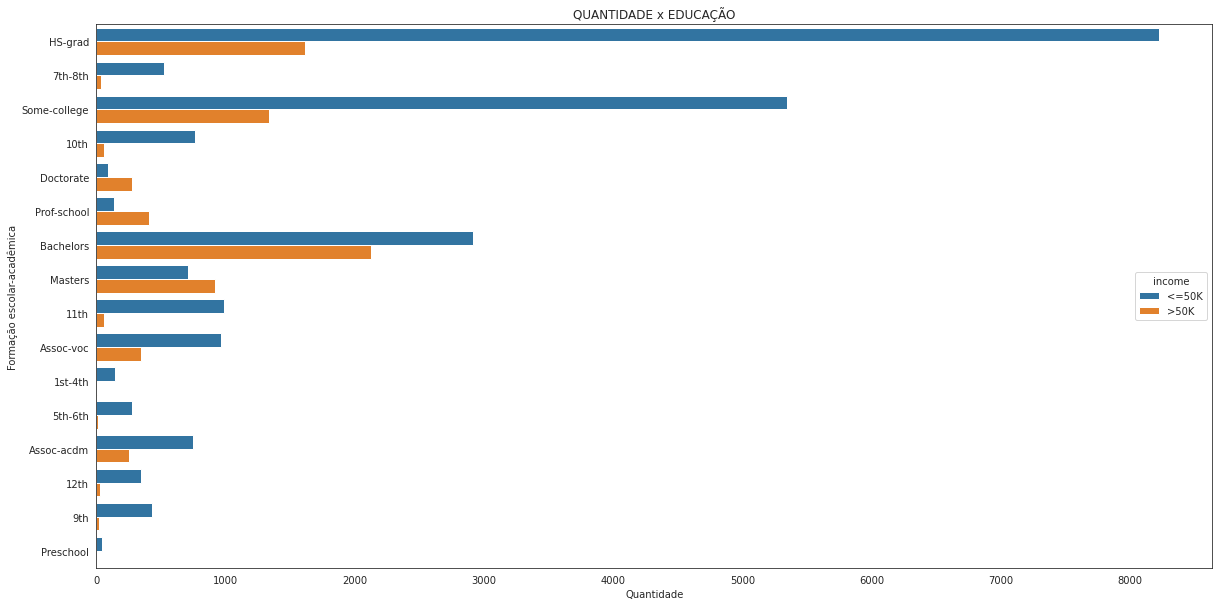

In [122]:
f, ax = plt.subplots(figsize=(20, 10))
sn.countplot(y='education', data=df, orient='h', hue='income')
ax.set_title('QUANTIDADE x EDUCAÇÃO', fontsize=12)
ax.set_xlabel('Quantidade', fontsize=10)
ax.set_ylabel('Formação escolar-acadêmica', fontsize=10)
ax

* Para os dois gráficos acima, me chama a atenção certas características, mostra-se que, para as pessoas que chegam a ter uma renda maior que 50 mil, são pessoas que exercem cargos de especialista e gerência. Porém, vendas me chama atenção, já que de acordo com a quantidade, conquista o terceiro lugar no gráfico. Mas por qual motivo me chama atenção?

* Bom, vamos analisar circuntâncias de escolaridade, uma pessoa que trabalha com vendas não necessariamente precisa ter uma formação acadêmica (o que é importante nós analisarmos juntos). Então, vamos analisar a seguir os seguintes fatores, como a educação pode ou não garantir uma renda maior que 50 mil? 

## 5.0 Testes e validações (TESTE A/B)

### 5.1 Tratamento de dados

In [123]:
trabalha_com_vendas = df.loc[df['occupation']=='Sales']
## Beleza!!! Filtramos todas as pessoas que estão relacionadas a ocução de vendas

## Para que possamos justificar algo, precisamos elaborar um pequeno teste A/B de grupos que possuem graus de escolaridade acima e abaixo da graduação
trabalha_com_vendas['education'].value_counts()

## Existe certas características que fogem do meu entendimento, então iremos focar nas principais escolaridades
muda_valores = {
    'HS-grad':'Graduado',
    'Some-college':'Ensino_Medio'
}

trabalha_com_vendas['education'] = trabalha_com_vendas['education'].replace(muda_valores)
trabalha_com_vendas = trabalha_com_vendas.loc[trabalha_com_vendas['education'].isin(['Graduado','Ensino_Medio'])]

In [124]:
#O nosso grupo de controçle será as pessoas que não possuem Graduação
grupo_de_controle = trabalha_com_vendas.loc[trabalha_com_vendas['education'] == 'Ensino_Medio']
grupo_de_controle = grupo_de_controle.sample(frac = 0.75, random_state=42)[['education','income']]

#O grupo experimental será das pessoas que de alguma forma conseguiram a oportunidade/tiveram o privilégio de garantir uma vaga na faculdade
grupo_experimental = trabalha_com_vendas.loc[trabalha_com_vendas['education'] == 'Graduado']
grupo_experimental = grupo_experimental.sample(frac = 0.75, random_state=42)[['education','income']]

grupo_de_controle['grupo'] = 'controle'
grupo_experimental['grupo'] = 'experimental'

display(grupo_de_controle.shape, grupo_experimental.shape)

teste_a_b = pd.concat([grupo_de_controle, grupo_experimental]).reset_index(drop=True)

(747, 3)

(789, 3)

### 5.1 Visualização de amostras

In [125]:
np.unique(teste_a_b['income'], return_counts=True)

(array(['<=50K', '>50K'], dtype=object), array([1218,  318]))

In [126]:
dict_income = {
    '<=50K':0,
    '>50K':1
}

teste_a_b['income'] = teste_a_b['income'].replace(dict_income)
display(np.unique(teste_a_b['income'], return_counts=True))

(array([0, 1]), array([1218,  318]))

In [127]:
teste_a_b['grupo'].value_counts()

experimental    789
controle        747
Name: grupo, dtype: int64

### 5.2 Modelagem estatística - resultados e conclusão

In [138]:
conversion_rates = teste_a_b.groupby('grupo')['income']

std_p = lambda x: np.std(x, ddof=0)              
se_p = lambda x: stats.sem(x, ddof=0)           

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['Taxa de conversão', 'Desvio Padrão', 'Erro padrão']


conversion_rates.style.format('{:.3f}')

,Taxa de conversão,Desvio Padrão,Erro padrão
grupo,,,
controle,0.216,0.411,0.015
experimental,0.199,0.399,0.014


* Avaliando o grupo experimental, que são as pessoas que tiveram acesso a uma graduação, percebemos que a taxa de conversão é menor que a taxa de controle. Porém, isso não nos diz muita coisa, precisamos enxergar se essas taxas estão dentro do nosso intervalo de confiança e olhar para o nosso valor de P, no qual irá determinar se nosso teste é um teste válido ou não.

In [161]:
controle_resultados = teste_a_b[teste_a_b['grupo'] == 'controle']['income']
experimental_resultados = teste_a_b[teste_a_b['grupo'] == 'experimental']['income']

pop_controle = controle_resultados.count()
pop_exp = experimental_resultados.count()

sucessos = [controle_resultados.sum(), experimental_resultados.sum()]
numero_observacao = [pop_controle, pop_exp]

z_stat, pval = proportions_ztest(sucessos, nobs=numero_observacao)

(menor_cont, menor_exp), (maior_cont, maior_exp) = proportion_confint(sucessos, nobs=numero_observacao, alpha=0.5)

print(f'Teste z: {z_stat:.2f}')
print(f'Valor de p: {pval:.3f}')
print(f'Intervalo de confiança 95% pelo grupo de controle: [{menor_cont:.3f}, {maior_cont:.3f}]')
print(f'Intervalo de confiança 95% pelo grupo experimental: [{menor_exp:.3f}, {maior_exp:.3f}]')

Teste z: 0.80
Valor de p: 0.424
Intervalo de confiança 95% pelo grupo de controle: [0.205, 0.226]
Intervalo de confiança 95% pelo grupo experimental: [0.189, 0.209]


* Como discutimos anteriormente, o nosso valor de P está abaixo do valor pré-determinado do nosso experimento (0.42 < 0.5), então, podemos reinterar que para a ocupação de vendas, não necessariamente a escolaridade da pessoa influência na renda anual acima de 50k. Vale salientar que, nossas taxas de conversão estão contidas no intervalo de confiança apresentado.

  * Para o grupo experimental, observamos que nosso intervalo de confiança confere [0.189, 0.209], em que inclui nosso valor de taxa de 19%.
  * Para o grupo de controle, observamos que nosso intervalo de confiança confere [0.205, 0.226], em que inclui nosso valor de taxa de 21%.

## 6.0 Classificação

* Agora que conhecemos bastante sobre os nossos dados, podemos desenvolver (modelar) arquiteturas de Machine Learning capazes de predizer quais características irão classificar pessoas que ganham (ou podem ganhar) acima de 50k anual. 